In [1]:
import sys
sys.path.insert(0, '../')
from data_preparation import *

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import re
import seaborn as sns
sns.set()



In [2]:
train_1 = pd.read_csv('../web-traffic-time-series-forecasting/train_1.csv')
data = data_per_date(train_1)

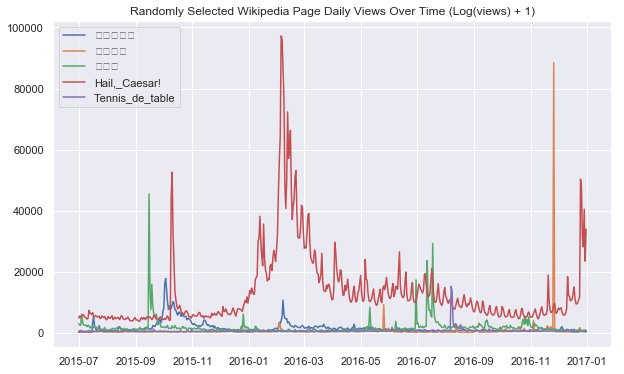

In [3]:
plot_random_series(data,5)

In [4]:
ML = find_page(data, 'Machine_learning')

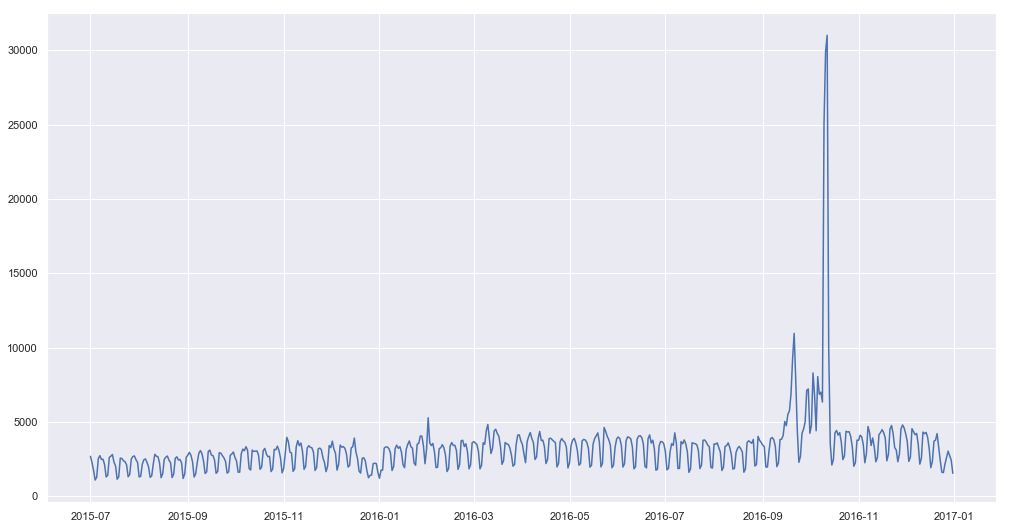

In [5]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.figure(figsize=(17, 9))
plt.plot(ML, color = 'b',linewidth=1.5)
plt.show()

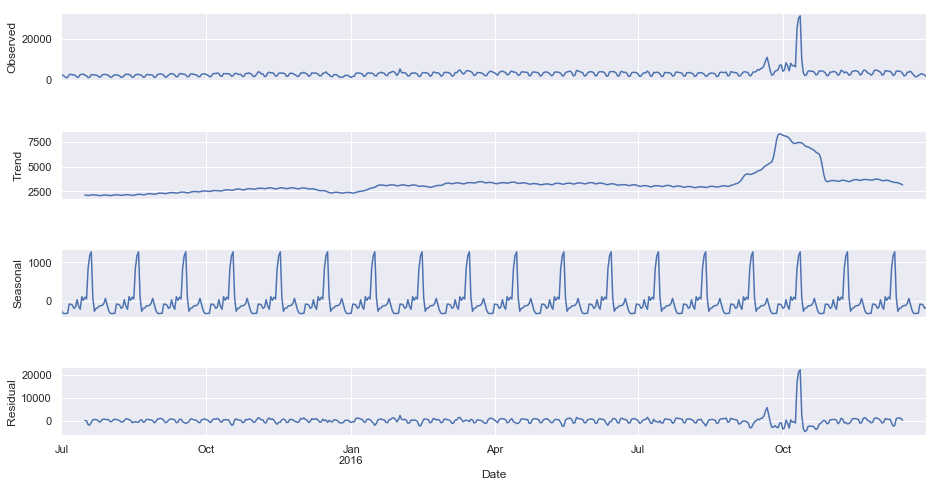

In [6]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(ML,freq=30, model = 'additive')
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

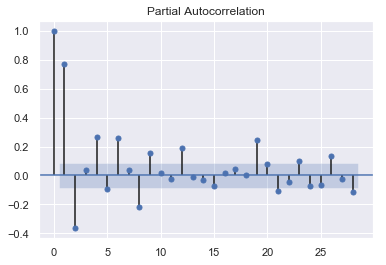

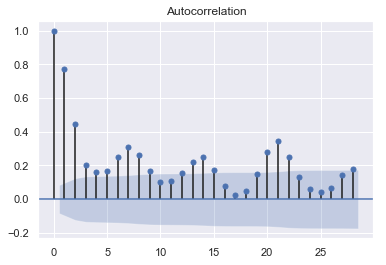

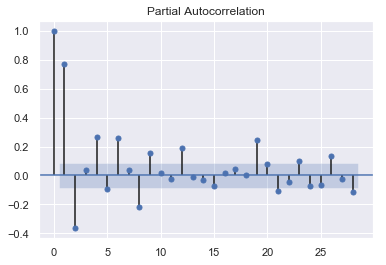

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ML['count'])
plot_pacf(ML['count'])

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

#resDiff = sm.tsa.arma_order_select_ic(my_page['count'],\
#                                      max_ar=7, max_ma=7, ic='aic', trend='c')
#print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

In [9]:
from arima_model import *
warnings.filterwarnings('ignore')


size = int(0.80*len(ML))
train, test = series_split(ML, size)

#train_deseasoned = aa.difference(train, 30)

arima = sm.tsa.statespace.SARIMAX(train,order=(7,1,7),seasonal_order=(0,0,0,0),\
                                  enforce_stationarity=False,\
                                  enforce_invertibility=False,).fit()

In [10]:
from sklearn.metrics import mean_absolute_error

pred = arima.predict(size+1, len(ML))

print("------------------")
print('ARIMA model MAE:{}'.format(mean_absolute_error(test,pred)))
print("------------------")

------------------
ARIMA model MAE:1928.2744431046342
------------------


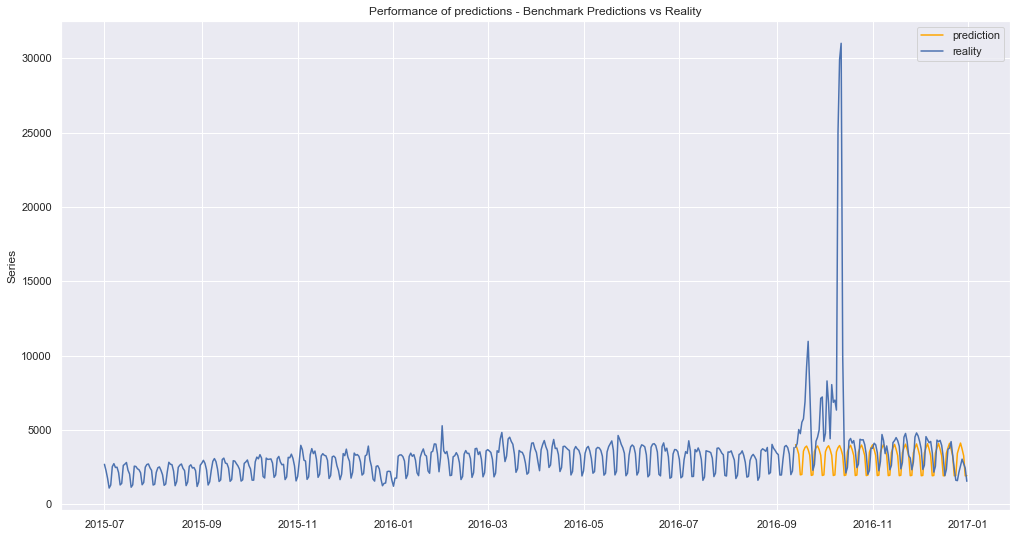

In [11]:
plot_arima(train, test, pred)

In [12]:
predictions = rolling_forecast(train, test, ARIMA, 1,1,1)

mae = mean_absolute_error(test, predictions)
print ("-----------------------------------------------")
print ("ARIMA ROLLING FORECAST model MAE:", mae)
print ("-----------------------------------------------")

-----------------------------------------------
ARIMA ROLLING FORECAST model MAE: 1311.0913123404448
-----------------------------------------------


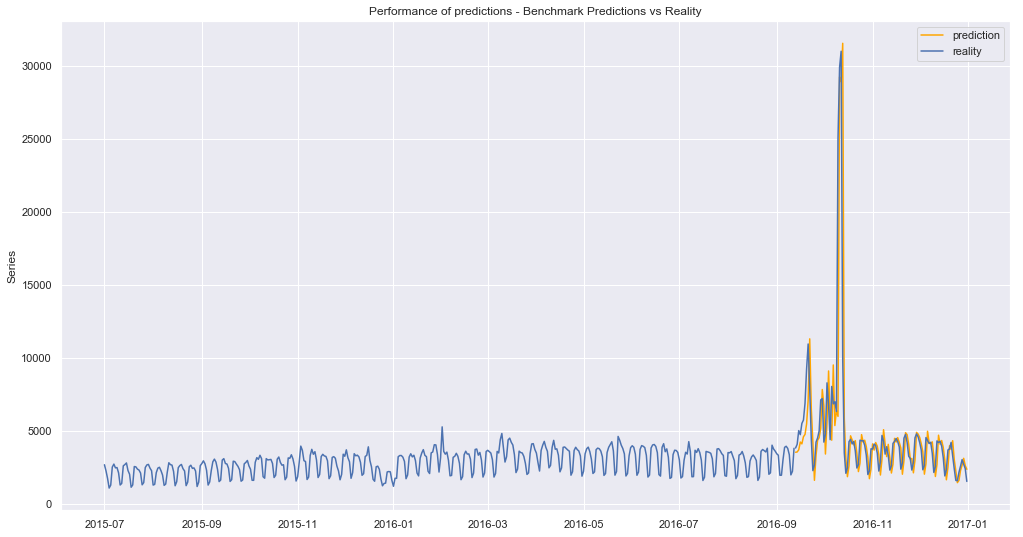

In [13]:
plot_arima(train, test, predictions)

## VAR Model

In [14]:
page = divide_page_by_lang(data, 'ASCII')

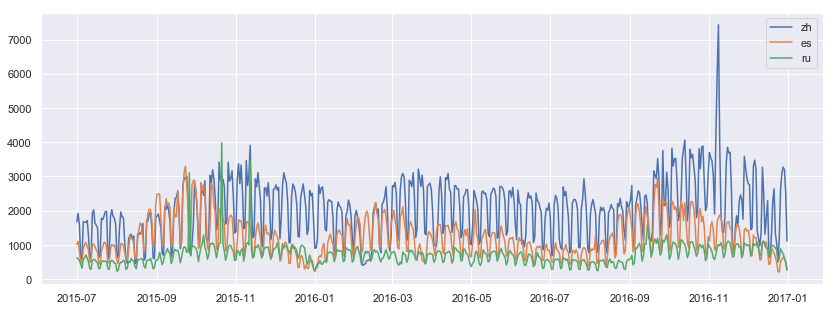

In [15]:
for key in page.columns:
    fig = plt.figure(1,figsize=[14,5])
    plt.plot(page[key], label = key , linewidth = 1.5)
    
plt.legend()
plt.show()

In [16]:
warnings.filterwarnings('ignore')


train = page[0:size]
test = page[size+1: len(data)]

predictions = rolling_forecast_var(train, test,sm.tsa.VARMAX, 1,0)
    
mae = mean_absolute_error(test, predictions)
print ("-----------------------------------------------")
print ("mae with 80% of the data to train:", mae)
print ("-----------------------------------------------")

-----------------------------------------------
mae with 80% of the data to train: 405.41238337813775
-----------------------------------------------


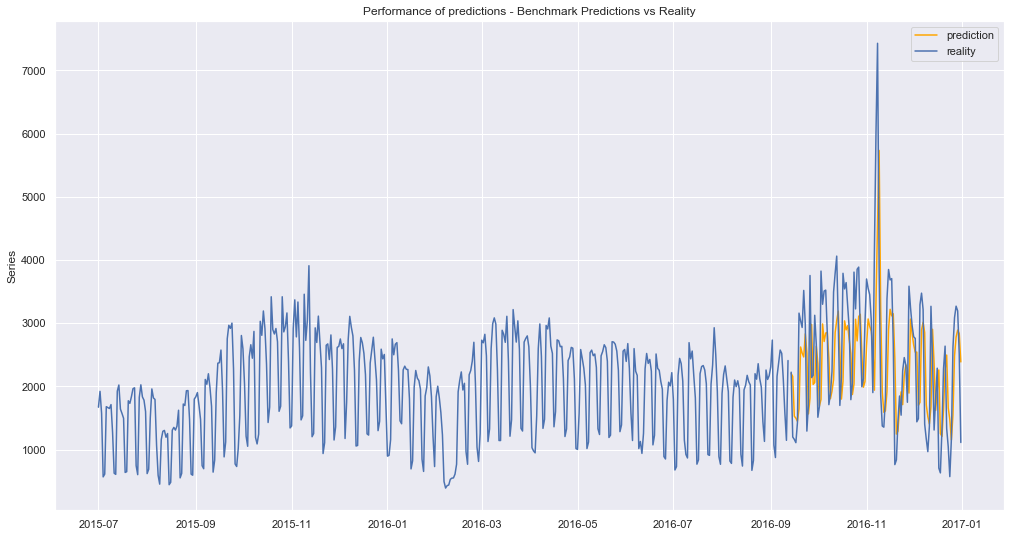

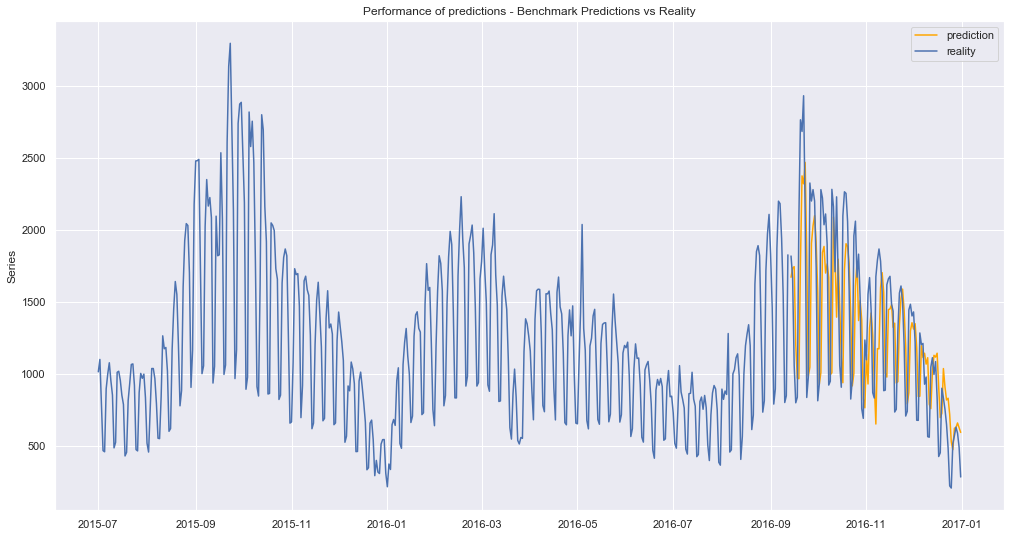

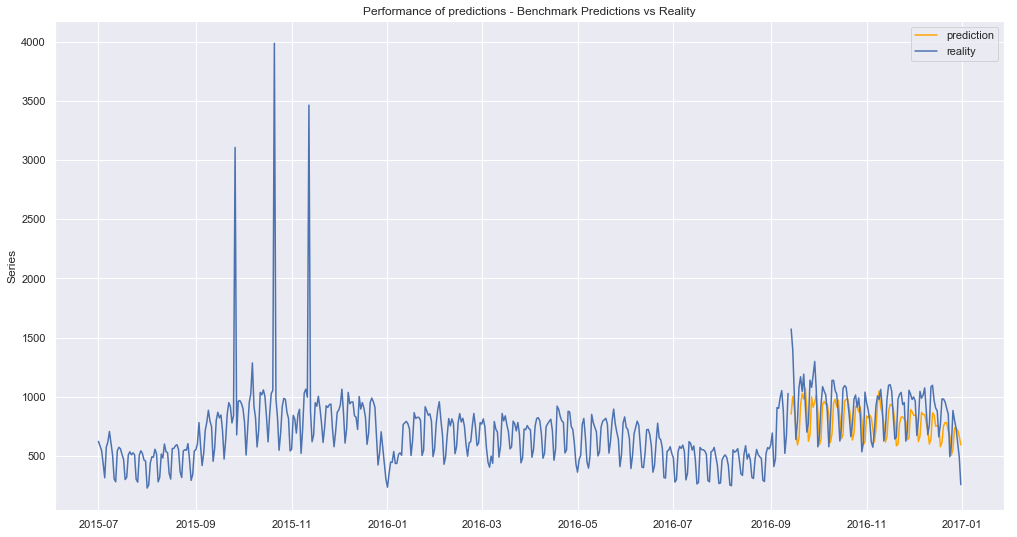

In [17]:
predictions.index = test.index
for key in page.columns:
    plot_arima(train[key], test[key], predictions[key])